In [8]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from sklearn.cross_validation import train_test_split

# Dataset Import
import statsmodels.api as sm

In [2]:
xls_file = pd.ExcelFile("data/Restaurant_Data.xlsx")

In [5]:
r = xls_file.parse('game_revenue_table')

In [6]:
r.head()

,Restaurant_Name,Date,Year,Month,Net_Sales,POS_Checks,Labor_Cost,Game_Revenue,Go_Live_Date,Franchise,State,Presto_Devices_Installed,Go_Live_Year,Go_Live_Month,Game_Revenue_Value
0,OR - 04,7/10/2014 12:00:00 AM,2014,7,3923.00,156,662.8000,16,5/4/2014 12:00:00 AM,Western Food Group,OR,40,2014,5,16.0000
1,AL - 04,8/1/2014 12:00:00 AM,2014,8,8160.00,297,1347.3700,n/a,12/1/2014 12:00:00 AM,Southern Group,AL,38,2014,12,0.0000
2,WA - 05,1/1/2014 12:00:00 AM,2014,1,2803.00,92,939.0600,n/a,7/1/2014 12:00:00 AM,Western Food Group,WA,38,2014,7,0.0000
3,AZ - 12,3/8/2015 12:00:00 AM,2015,3,4110.34,179,580.3461,17.9167,10/6/2014 12:00:00 AM,Western Food Group,AZ,50,2014,10,17.9167
4,Ca - 13,7/3/2014 12:00:00 AM,2014,7,4696.08,202,829.0617,19.8333,3/17/2014 12:00:00 AM,Western Food Group,CA,50,2014,3,19.8333


In [11]:
r1=r.drop(['Restaurant_Name','Date','Month','Go_Live_Date','State','Go_Live_Month','Game_Revenue'], axis=1)

In [12]:
r1.head()

,Year,Net_Sales,POS_Checks,Labor_Cost,Franchise,Presto_Devices_Installed,Go_Live_Year,Game_Revenue_Value
0,2014,3923.00,156,662.8000,Western Food Group,40,2014,16.0000
1,2014,8160.00,297,1347.3700,Southern Group,38,2014,0.0000
2,2014,2803.00,92,939.0600,Western Food Group,38,2014,0.0000
3,2015,4110.34,179,580.3461,Western Food Group,50,2014,17.9167
4,2014,4696.08,202,829.0617,Western Food Group,50,2014,19.8333


In [16]:
r2=r1[r1.Year==2014]

In [18]:
r2=r2[r2.Go_Live_Year<2014]


,Year,Net_Sales,POS_Checks,Labor_Cost,Franchise,Presto_Devices_Installed,Go_Live_Year,Game_Revenue_Value
9,2014,456,15,190.06,Southern Group,53,2013,4.2500
11,2014,3950,214,804.47,Central Foods,52,2013,20.8333
12,2014,2610,143,710.63,Central Foods,50,2013,14.9167
14,2014,2982,111,398.94,Central Foods,41,2013,12.2500
15,2014,2386,84,435.66,Central Foods,45,2013,10.0000


In [20]:
r2_dummies = pd.get_dummies(r2['Franchise'])

In [23]:
r2_dummies.head()

,Central Foods,Southern Group,Western Food Group
9,0,1,0
11,1,0,0
12,1,0,0
14,1,0,0
15,1,0,0


In [25]:
r2_dummies.columns = ['Central_Foods','Southern_Group','Western_Food_Group']
r3 = r2.drop(['Franchise'],axis=1)
r3.head()


,Year,Net_Sales,POS_Checks,Labor_Cost,Presto_Devices_Installed,Go_Live_Year,Game_Revenue_Value
9,2014,456,15,190.06,53,2013,4.2500
11,2014,3950,214,804.47,52,2013,20.8333
12,2014,2610,143,710.63,50,2013,14.9167
14,2014,2982,111,398.94,41,2013,12.2500
15,2014,2386,84,435.66,45,2013,10.0000


In [26]:
r3 = pd.concat([r3,r2_dummies],axis=1)
r3.head()


,Year,Net_Sales,POS_Checks,Labor_Cost,Presto_Devices_Installed,Go_Live_Year,Game_Revenue_Value,Central_Foods,Southern_Group,Western_Food_Group
9,2014,456,15,190.06,53,2013,4.2500,0,1,0
11,2014,3950,214,804.47,52,2013,20.8333,1,0,0
12,2014,2610,143,710.63,50,2013,14.9167,1,0,0
14,2014,2982,111,398.94,41,2013,12.2500,1,0,0
15,2014,2386,84,435.66,45,2013,10.0000,1,0,0


In [28]:
Y = r3.Game_Revenue_Value
Y.head()

9      4.2500
11    20.8333
12    14.9167
14    12.2500
15    10.0000
Name: Game_Revenue_Value, dtype: float64

In [29]:
Y = np.ravel(Y)

In [30]:
Y

array([  4.25  ,  20.8333,  14.9167, ...,  14.5   ,  17.6667,  12.9167])

In [33]:
X = r3.drop(['Game_Revenue_Value','Year'],axis=1)

X.head()


,Net_Sales,POS_Checks,Labor_Cost,Presto_Devices_Installed,Go_Live_Year,Central_Foods,Southern_Group,Western_Food_Group
9,456,15,190.06,53,2013,0,1,0
11,3950,214,804.47,52,2013,1,0,0
12,2610,143,710.63,50,2013,1,0,0
14,2982,111,398.94,41,2013,1,0,0
15,2386,84,435.66,45,2013,1,0,0


In [39]:
import sklearn
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

# Fit our data
linear_model.fit(X,Y)

# Check our accuracy
linear_model.score(X,Y)

0.99999999995746236

In [40]:
Y.mean()

14.137384340845344

In [41]:
# Use zip to bring the column names 
#and the np.transpose function to bring together the coefficients from the model
#"transpose" is used to allaign our coefficient from rows to columns
coeff_df = DataFrame(zip(X.columns, np.transpose(linear_model.coef_)))
#the new seaborn treat assignment as just an assignment without printing
coeff_df

,0,1
0,Net_Sales,-5.424405e-10
1,POS_Checks,8.333334e-02
2,Labor_Cost,3.276465e-10
3,Presto_Devices_Installed,-9.290364e-08
4,Go_Live_Year,-2.522707e-06
5,Central_Foods,6.472393e-09
6,Southern_Group,2.887834e-07
7,Western_Food_Group,-2.952558e-07


In [57]:
# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

# Make a new model
linear_model2 = LinearRegression()

# Now fit the new model
linear_model2.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [58]:
pred_train = linear_model2.predict(X_train)
pred_test = linear_model2.predict(X_test)

In [59]:
print "Fit a model X_train, and calculate MSE with Y_train: %.2f"  % np.mean((Y_train - pred_train) ** 2)

print "Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f"  %np.mean((Y_test - pred_test) ** 2)

Fit a model X_train, and calculate MSE with Y_train: 0.00
Fit a model X_train, and calculate MSE with X_test and Y_test: 0.00


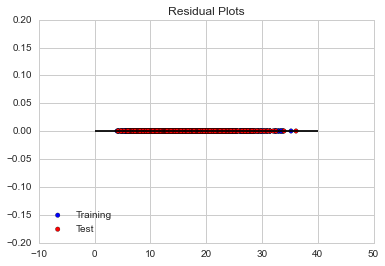

In [64]:
# Scatter plot the training data
#c = 'b' ----color = "brown", alpha =1 ----how see-through this is 
plt.ylim(-0.2,0.2)
train = plt.scatter(pred_train,(pred_train-Y_train),c='b',alpha=1)

# Scatter plot the testing data
test = plt.scatter(pred_test,(pred_test-Y_test),c='r',alpha=1)

# Plot a horizontal axis line at 0
plt.hlines(y=0,xmin=0,xmax=40)

#Labels
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')


C:\Anaconda\lib\site-packages\seaborn\linearmodels.py:1283: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
C:\Anaconda\lib\site-packages\seaborn\linearmodels.py:1349: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


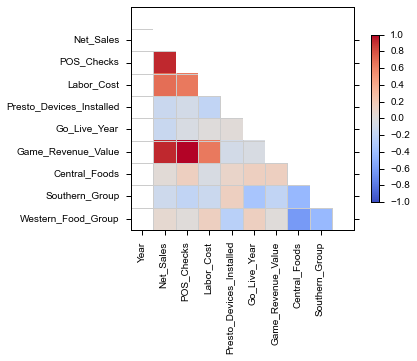

In [65]:
import seaborn
kw = {'axes.edgecolor': '0', 'text.color': '0', 'ytick.color': '0', 'xtick.color': '0',
      'ytick.major.size': 5, 'xtick.major.size': 5, 'axes.labelcolor': '0'}

seaborn.set_style("whitegrid", kw)

ax = seaborn.corrplot(r3, annot=False, diag_names=False)


In [66]:
r4=r3.drop(['POS_Checks','Labor_Cost','Central_Foods'], axis=1)
r4.head()

,Year,Net_Sales,Presto_Devices_Installed,Go_Live_Year,Game_Revenue_Value,Southern_Group,Western_Food_Group
9,2014,456,53,2013,4.2500,1,0
11,2014,3950,52,2013,20.8333,0,0
12,2014,2610,50,2013,14.9167,0,0
14,2014,2982,41,2013,12.2500,0,0
15,2014,2386,45,2013,10.0000,0,0


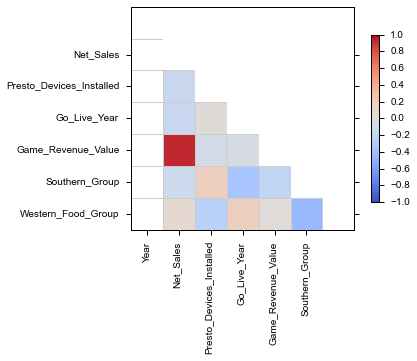

In [67]:
kw = {'axes.edgecolor': '0', 'text.color': '0', 'ytick.color': '0', 'xtick.color': '0',
      'ytick.major.size': 5, 'xtick.major.size': 5, 'axes.labelcolor': '0'}

seaborn.set_style("whitegrid", kw)

ax = seaborn.corrplot(r4, annot=False, diag_names=False)

In [68]:
Y = r4.Game_Revenue_Value
Y.head()

9      4.2500
11    20.8333
12    14.9167
14    12.2500
15    10.0000
Name: Game_Revenue_Value, dtype: float64

In [69]:
X = r4.drop(['Game_Revenue_Value'],axis=1)

X.head()

,Year,Net_Sales,Presto_Devices_Installed,Go_Live_Year,Southern_Group,Western_Food_Group
9,2014,456,53,2013,1,0
11,2014,3950,52,2013,0,0
12,2014,2610,50,2013,0,0
14,2014,2982,41,2013,0,0
15,2014,2386,45,2013,0,0


In [70]:
import sklearn
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()

# Fit our data
linear_model.fit(X,Y)

# Check our accuracy
linear_model.score(X,Y)

0.88722529073604495

In [71]:
Y.mean()


14.137384340845346

In [72]:
# Use zip to bring the column names 
#and the np.transpose function to bring together the coefficients from the model
#"transpose" is used to allaign our coefficient from rows to columns
coeff_df = DataFrame(zip(X.columns, np.transpose(linear_model.coef_)))
#the new seaborn treat assignment as just an assignment without printing
coeff_df

,0,1
0,Year,0.000000
1,Net_Sales,0.003168
2,Presto_Devices_Installed,0.032946
3,Go_Live_Year,1.468779
4,Southern_Group,-1.138012
5,Western_Food_Group,-0.780403


In [73]:
# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

# Make a new log_model
linear_model2 = LinearRegression()

# Now fit the new model
linear_model2.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [75]:
print "Fit a model X_train, and calculate MSE with Y_train: %.2f"  % np.mean((Y_train - pred_train) ** 2)

print "Fit a model X_train, and calculate MSE with X_test and Y_test: %.2f"  %np.mean((Y_test - pred_test) ** 2)


Fit a model X_train, and calculate MSE with Y_train: 35.05
Fit a model X_train, and calculate MSE with X_test and Y_test: 36.51


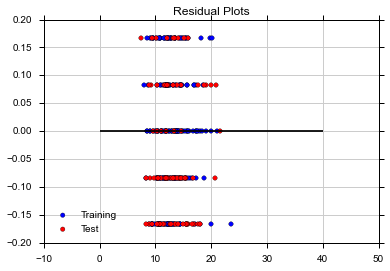

In [76]:
# Scatter plot the training data
#c = 'b' ----color = "brown", alpha =1 ----how see-through this is 
plt.ylim(-0.2,0.2)
train = plt.scatter(pred_train,(pred_train-Y_train),c='b',alpha=1)

# Scatter plot the testing data
test = plt.scatter(pred_test,(pred_test-Y_test),c='r',alpha=1)

# Plot a horizontal axis line at 0
plt.hlines(y=0,xmin=0,xmax=40)

#Labels
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')